In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from sklearn.model_selection import train_test_split

In [2]:
def load_jsonl(path):
    data = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

df = load_jsonl("../datasets/final_dataset/merged_data.jsonl")
df.head(), df.shape

(          id                                question  \
 0  medical_0                What is (are) Glaucoma ?   
 1  medical_1                  What causes Glaucoma ?   
 2  medical_2     What are the symptoms of Glaucoma ?   
 3  medical_3  What are the treatments for Glaucoma ?   
 4  medical_4                What is (are) Glaucoma ?   
 
                                               answer           source  \
 0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
 1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
 2  Symptoms of Glaucoma Glaucoma can develop in o...  NIHSeniorHealth   
 3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
 4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
 
   focus_area  
 0   Glaucoma  
 1   Glaucoma  
 2   Glaucoma  
 3   Glaucoma  
 4   Glaucoma  ,
 (228295, 5))

In [12]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228295 entries, 0 to 228294
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          228295 non-null  object
 1   question    228295 non-null  object
 2   answer      228295 non-null  object
 3   source      228295 non-null  object
 4   focus_area  16412 non-null   object
dtypes: object(5)
memory usage: 8.7+ MB


,id,question,answer,source,focus_area
count,228295,228295,228295,228295,16412
unique,228171,226738,227549,11,5127
top,meddialog_14,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...,PubMedQA,Breast Cancer
freq,3,20,348,211269,53


In [13]:
df.isna().sum()

id                 0
question           0
answer             0
source             0
focus_area    211883
dtype: int64

In [14]:
df["q_len"] = df["question"].str.len()
df["a_len"] = df["answer"].str.len()

df[["q_len", "a_len"]].describe()

,q_len,a_len
count,228295.000000,228295.000000
mean,110.080475,333.002755
std,35.429935,500.789656
min,15.000000,0.000000
25%,90.000000,176.000000
50%,109.000000,247.000000
75%,129.000000,343.000000
max,3553.000000,26976.000000


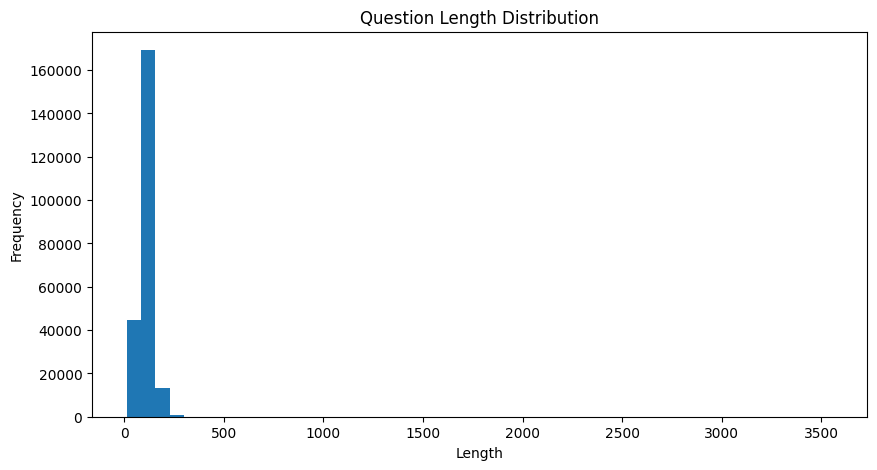

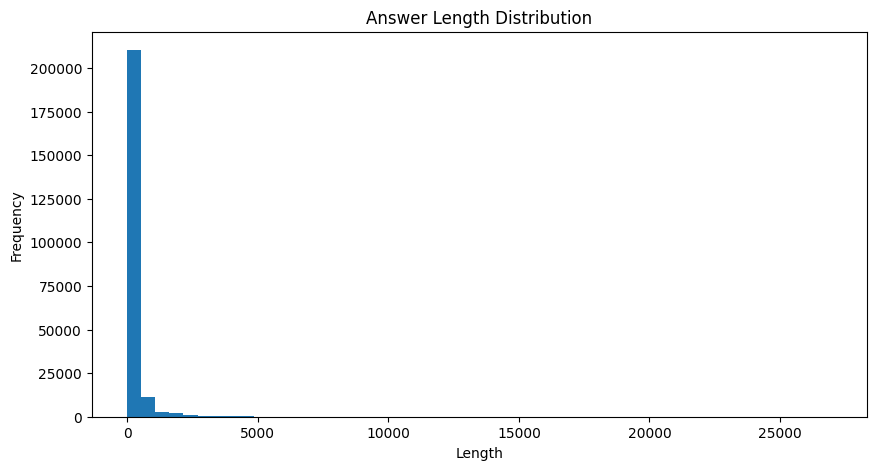

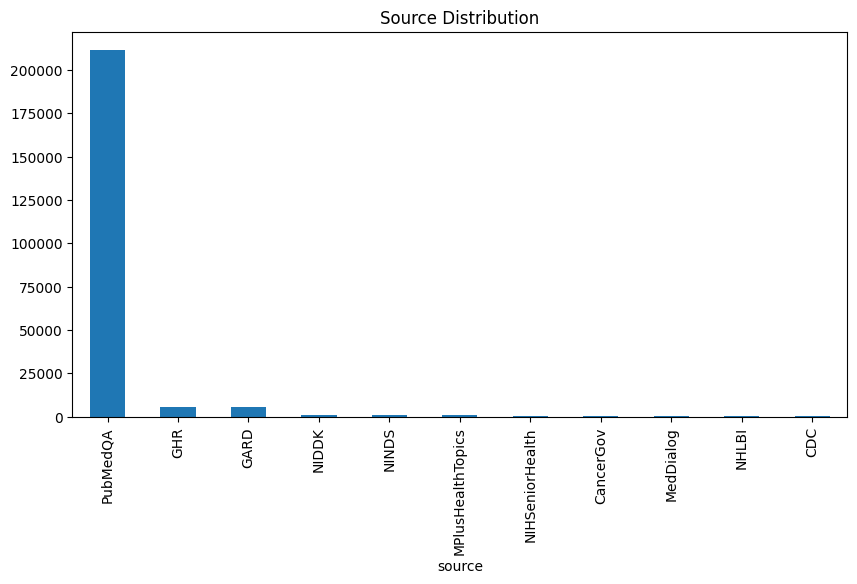

In [15]:
# Question lengths before cleaning
plt.figure(figsize=(10,5))
plt.hist(df["q_len"], bins=50)
plt.title("Question Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Answer lengths before cleaning
plt.figure(figsize=(10,5))
plt.hist(df["a_len"], bins=50)
plt.title("Answer Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Source distribution before cleaning
df["source"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Source Distribution")
plt.show()


In [16]:
(df["question"].str.len() == 0).sum(), (df["answer"].str.len() == 0).sum()

(0, 5)

In [17]:
(df["question"].str.len() < 10).sum()

0

In [18]:
(df["answer"].str.len() < 10).sum()

27

In [19]:
df.shape

(228295, 7)

In [20]:
df = df[df["answer"].str.len() > 10]
df.shape

(228267, 7)

In [21]:
(df["question"].str.len() > 500).sum()

58

In [22]:
df = df[df["question"].str.len() < 500]
df.shape

(228209, 7)

In [23]:
df["question"] = df["question"].str.replace(r"\s+", " ", regex=True).str.strip()
df["answer"] = df["answer"].str.replace(r"\s+", " ", regex=True).str.strip()

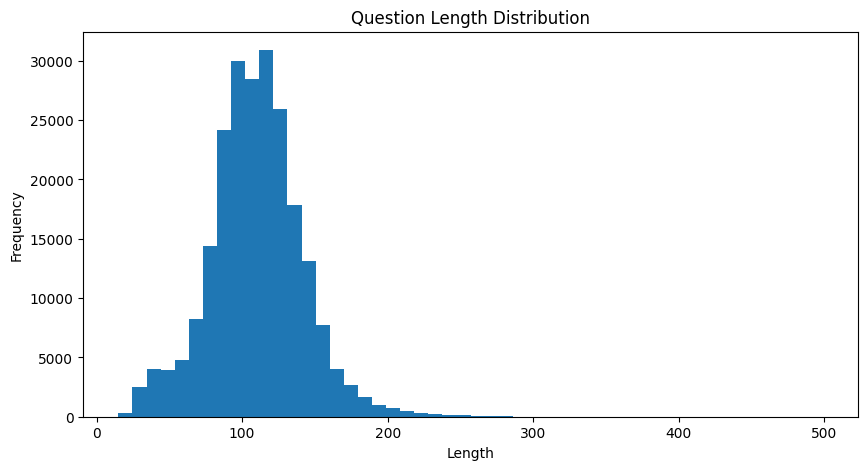

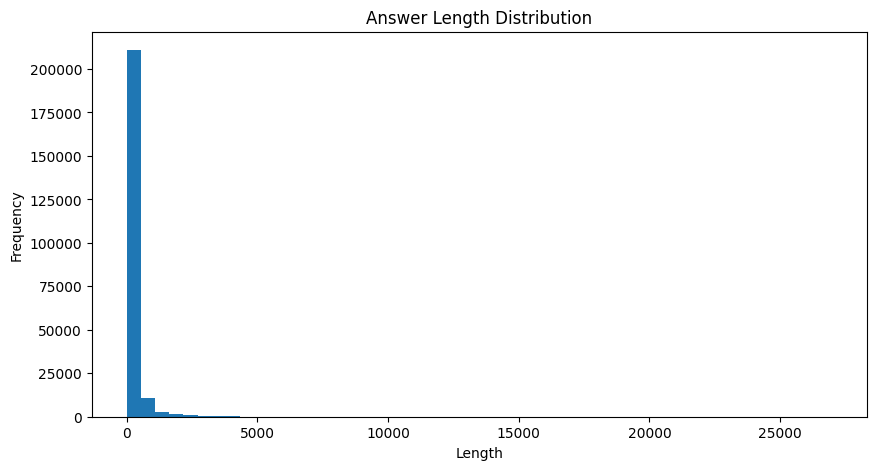

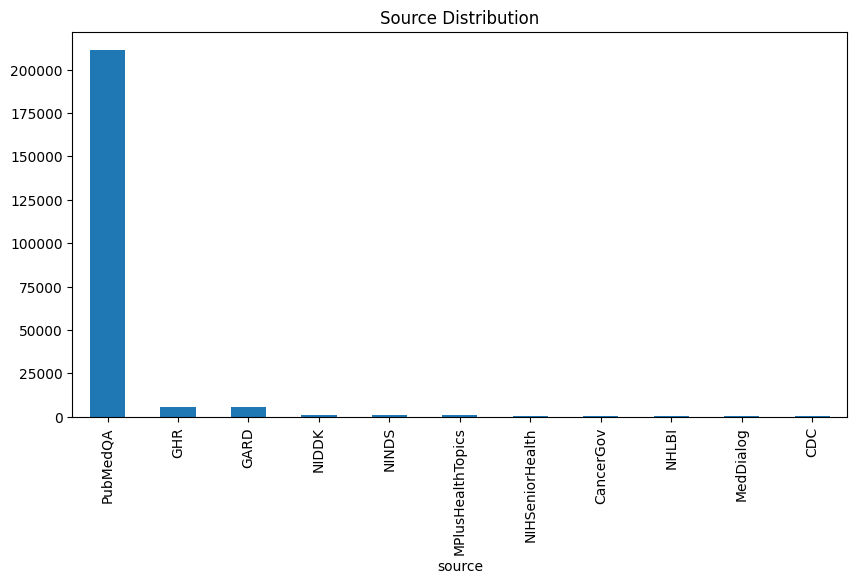

In [24]:
# Question lengths after cleaning
plt.figure(figsize=(10,5))
plt.hist(df["q_len"], bins=50)
plt.title("Question Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Answer lengths after cleaning
plt.figure(figsize=(10,5))
plt.hist(df["a_len"], bins=50)
plt.title("Answer Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Source distribution after cleaning
df["source"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Source Distribution")
plt.show()

In [28]:
df.shape

(228209, 7)

In [29]:
df1.drop_duplicates(subset=["question", "answer"], inplace=True)
df1.shape

(228075, 7)

In [30]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split

def save_jsonl(df, path):
    with open(path, "w", encoding="utf-8") as f:
        for _, row in df.iterrows():
            f.write(json.dumps(row.to_dict(), ensure_ascii=False) + "\n")


In [31]:

# clean_df = your cleaned dataset

train_df, temp_df = train_test_split(
    df,
    test_size=0.20,     # 20% goes to val + test
    random_state=77,
    shuffle=True
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,     # 10% val, 10% test
    random_state=77,
    shuffle=True
)

print("Train size:", train_df.shape)
print("Val size:", val_df.shape)
print("Test size:", test_df.shape)


Train size: (182567, 7)
Val size: (22821, 7)
Test size: (22821, 7)


In [ ]:
save_jsonl(train_df, "../datasets/processed/train.jsonl")
save_jsonl(val_df, "../datasets/processed/val.jsonl")
save_jsonl(test_df, "../datasets/processed/test.jsonl")

print("Saved train.jsonl, val.jsonl, test.jsonl")

Saved train.jsonl, val.jsonl, test.jsonl


In [ ]:
with open("../datasets/processed/train.jsonl", "r", encoding="utf-8") as f:
    for i in range(3):
        print(f.readline())

{"id": "medical_11088", "question": "Is glycogen storage disease type I inherited ?", "answer": "This condition is inherited in an autosomal recessive pattern, which means both copies of the gene in each cell have mutations. The parents of an individual with an autosomal recessive condition each carry one copy of the mutated gene, but they typically do not show signs and symptoms of the condition.", "source": "GHR", "focus_area": "glycogen storage disease type I", "q_len": 46, "a_len": 303}

{"id": "medical_8214", "question": "What are the treatments for Mitral Valve Prolapse ?", "answer": "Most people who have mitral valve prolapse (MVP) dont need treatment because they dont have symptoms and complications. Even people who do have symptoms may not need treatment. The presence of symptoms doesnt always mean that the backflow of blood through the valve is significant. People who have MVP and troublesome mitral valve backflow may be treated with medicines, surgery, or both. The goals of 